
![Image of Yaktocat](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRTKDLFTswfWdXRi0Cisa0Muwle-rWpyql27A&usqp=CAU)


 ## <a style="color:#CDCD43" font=" Bookman"  size="75" >&quot; TP 2 Clustering  &quot;    </a> 


 ## <a style="color:#6666ff" font=" Bookman"  size="75" >Réalisé par: Amina Dziri    </a> 

***

In [75]:
!pip install opencv-python

<p style="color:#6699ff">L'algorithme des Kmeans peut être utilisé pour effectuer une segmentation d'une image qui présente des zones de couleur relativement uniforme. On représente l'ensemble des pixels de l'image dans un espace à trois dimensions en se basant sur leurs composantes Rouge / Vert / bleu. On obtient ainsi un nuage de points sur lequel on applique l'algorithme des k-means</p>


 ### <a style="color:#66ffb3" font=" Bookman"  size="75" >&quot; Partie1: Appliquer Clustering  &quot;    </a> 


 

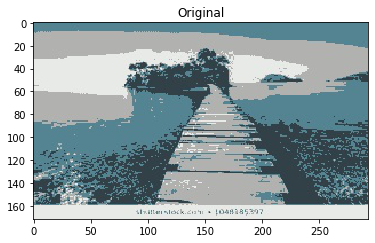

In [76]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
# Scaling the image pixels values within 0-1
img = imread('./nature.jpg') / 255
plt.imshow(img)
plt.title('Original')
plt.show()

<p style="color:#66b3ff">L'image original contienne pleine d'objets ainsi de couleurs</p>

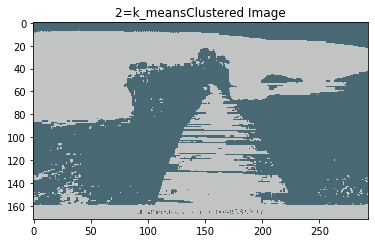

In [77]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('2=k_meansClustered Image')
plt.show()

<p style="color:#66b3ff">Avec k=2, 
Comme il est visible à l'œil nu, il y a deux segments de couleur dans l'image couleur bleu foncé de la mer  et le gris 
pour le pont ainsi que la montagne</p>

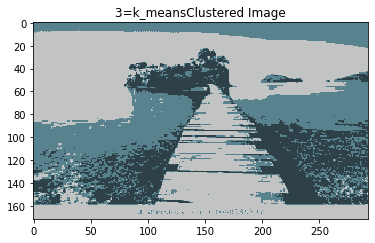

In [78]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('3=k_meansClustered Image')
plt.show()

<p style="color:#66b3ff">Avec K=3
Il s'ajoute avec l'image avec k=2 un autre couleur de degré  bleu moins foncé</p>

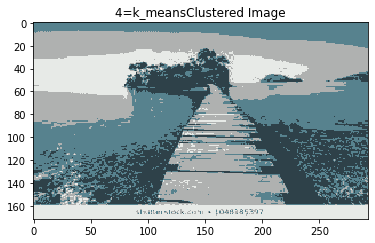

In [79]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=4, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('4=k_meansClustered Image')
plt.show()

<p style="color:#66b3ff">Avec K=4
On constate un autre coleur qui s'additionne c'est coleur soman a celui de K=3 </p>



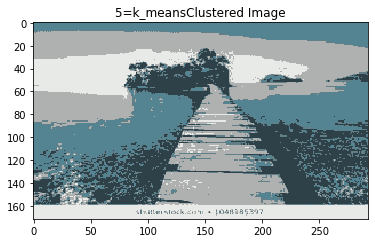

In [80]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=5, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('5=k_meansClustered Image')
plt.show()

<p style="color:#66b3ff">Avec K=5 
un degré de bleu sera visible au ciel </p>

## <p style="color:#ff6666">Synthése</p>

 l'algorithme étudié permet une bonne segmentation. Néanmoins, les images comportant des défauts (reflet, partie sombre, flou,…)

Nous avons constaté que l' algorithme nécessite une connaissance préalable du nombre de clusters à déterminer, toute
en changeant n_cluster il y a d'autres couleurs qui s'additionnent.

Nous pouvons donc conclure que l' algorithme K-means est efficace pour la détection de caractères, mais n'est pas 
approprié à des images contenant un grand nombre d’objets alors, k-means est plus adapté aux images de
faible résolution

***

 ## <p style="color:#d9ff66"> 2éme méthode: Segmentation avec kmeans en utilisant imread et imwrite pour afficher</p>

***

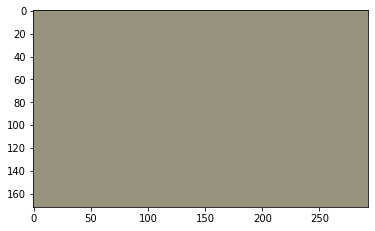

In [81]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 1)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

plt.imshow(quant)



In [82]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('nature1.jpg', quant)
#plt.imshow(image0)

cv2.imread('nature.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

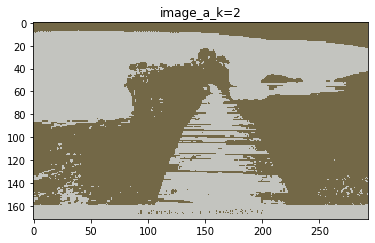

In [83]:
plt.title('image_origine')
plt.imshow(image)

plt.title('image_a_k=2')
plt.imshow(quant)

In [84]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('nature3.jpg', quant)
#plt.imshow(image0)

cv2.imread('nature.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

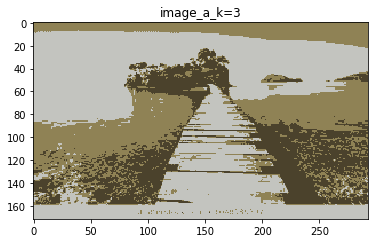

In [85]:

plt.title('image_origine')
plt.imshow(image)

plt.title('image_a_k=3')
plt.imshow(quant)



In [86]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('nature4.jpg', quant)
#plt.imshow(image0)

cv2.imread('nature.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

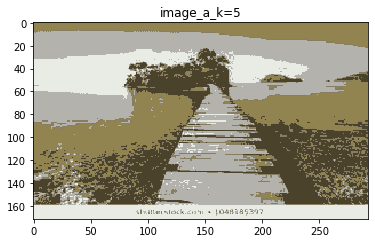

In [87]:
plt.title('image_origine')
plt.imshow(image)

plt.title('image_a_k=5')
plt.imshow(quant)

***

##  <p style="color:#ff6666"> Conclusion </p>


***

### On commence par K=2, Il y 2 couleurs dominantes(=representatives). Alors dés qu'on augumente nombre de clusters il y aura un changement de nuances de couleurs. Et plus que nombre de cluster est grand l'image de kmeans=n se rassemble a l'image originale

# Essayer de faire une fonction kmeans

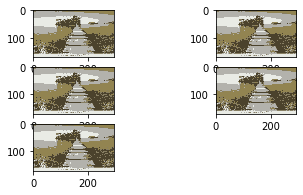

In [88]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')


def k_mean_fonct(image, r, c ):
    for i in [1, 2, 3, 4, 5]:
        clt = KMeans(n_clusters = i)
        plt.subplot(r,c,i)
        (h1, w1) = image.shape[:2]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

        image = image.reshape((image.shape[0] * image.shape[1], 3))
        
        labels = clt.fit_predict(image)
        quant = clt.cluster_centers_.astype("uint8")[labels]

           #reshape the feature vectors to images
        quant = quant.reshape((h1, w1, 3))
        image = image.reshape((h1, w1, 3))

         # convert from L*a*b* to RGB
        quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
        image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

         #cv2.imwrite('test.jpg', quant)
      #  plt.imshow(image)
        #plt.imshow(quant)

        #cv2.imread('nature.jpg')
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

plt.imshow(quant)
plt.subplot(4,2,1)
plt.imshow(quant)
plt.subplot(4,2,2)
plt.imshow(quant)
plt.subplot(4,2,3)
plt.imshow(quant)
plt.subplot(4,2,4)
plt.imshow(quant)
plt.subplot(4,2,5)
plt.imshow(quant)
   

****


 ### <a style="color:#ffb366" font=" Bookman"  size="75" >&quot; Partie2: Afficher le bruit d'image  &quot;    </a> 


****

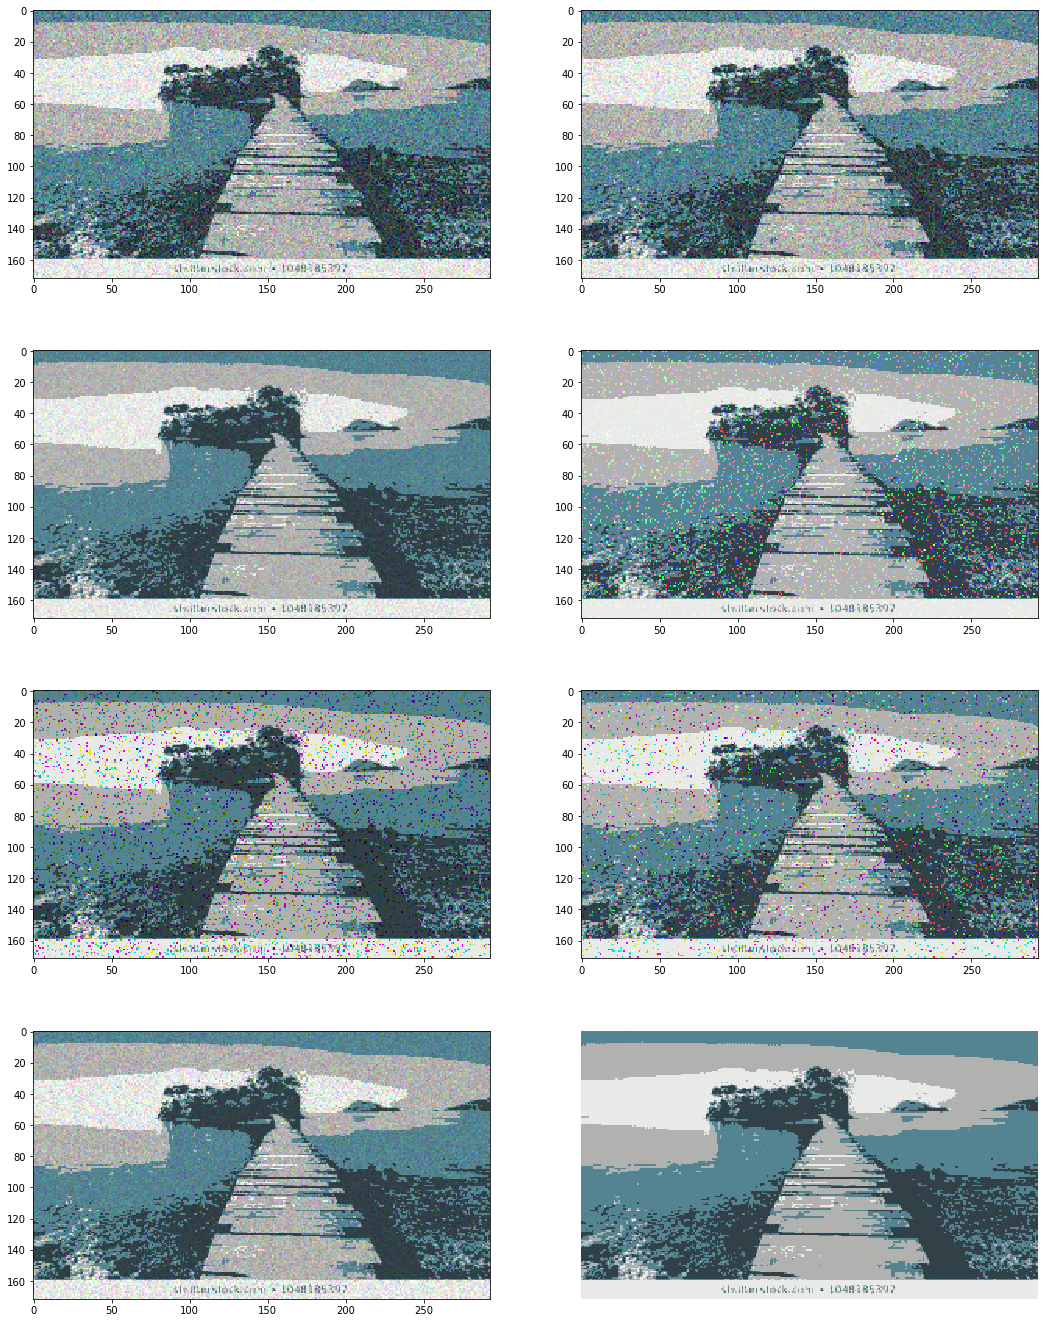

In [89]:
import skimage.io
import matplotlib.pyplot as plt
img_path="nature.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
        plt.title(mode)
        plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


 ### <a style="color:#ffb366" font=" Bookman"  size="75" >&quot; Partie2: Application au débruitage d'images  &quot;    </a> 





#### Choix du bruits "Salt and Pepper"

****

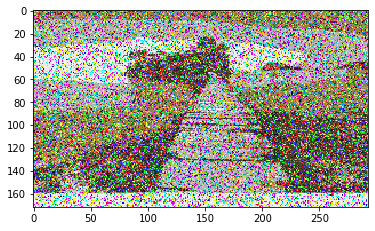

In [90]:

import cv2
import numpy as np
from skimage.util import random_noise
 
# Load the image
img = cv2.imread("nature.jpg")
 
# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')
 
# Display the noise image

plt.imshow(noise_img)
plt.show()


## Fussionner les deux images 


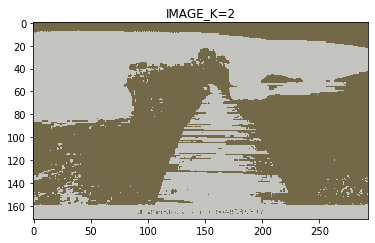

In [91]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]


image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
plt.title("IMAGE_K=2")
plt.imshow(quant)

noise_img = random_noise(quant, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')



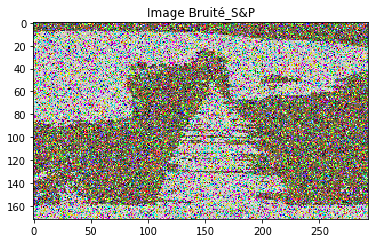

In [92]:
plt.title("Image Bruité_S&P")
plt.imshow(noise_img)
plt.show()


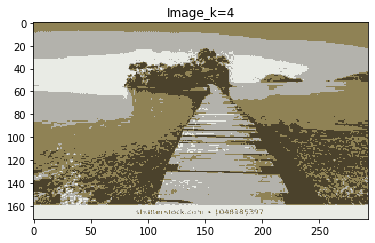

In [93]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]


image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 4)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

plt.title("Image_k=4")
plt.imshow(quant)

noise_img = random_noise(quant, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')



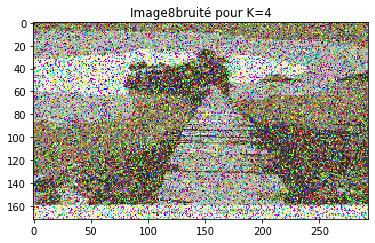

In [94]:
plt.title("Image8bruité pour K=4")
plt.imshow(noise_img)
plt.show()


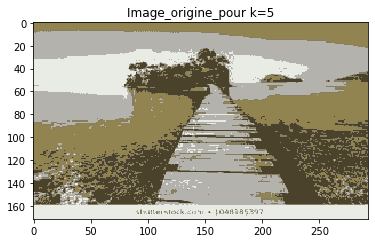

In [95]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]


image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

plt.title("Image_origine_pour k=5")
plt.imshow(quant)

noise_img = random_noise(quant, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')



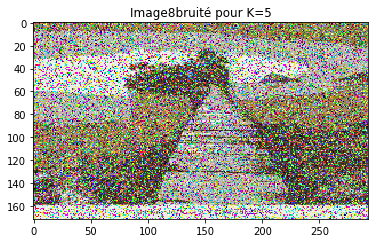

In [96]:

plt.title("Image8bruité pour K=5")
plt.imshow(noise_img)
plt.show()


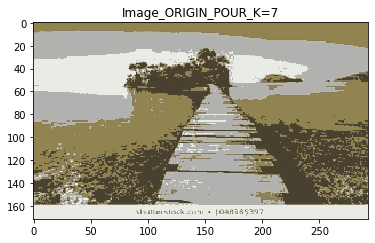

In [97]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]


image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 7)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

plt.title("Image_ORIGIN_POUR_K=7")
plt.imshow(quant)

noise_img = random_noise(quant, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')



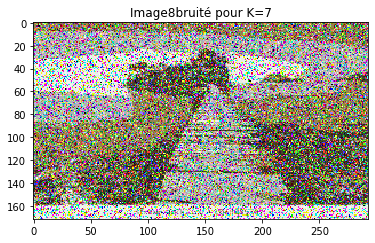

In [98]:

plt.title("Image8bruité pour K=7")
plt.imshow(noise_img)
plt.show()


## Choix Filtre Gaussien

In [99]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


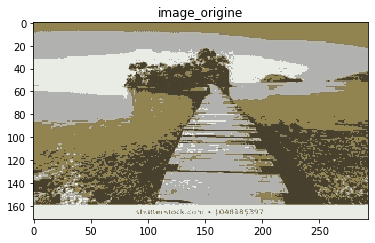

In [100]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io


image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]


image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 7)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

fig = plt.figure()
plt.title ("image_origine")
plt.imshow(quant)

# Generate Gaussian noise
gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(image,gauss)



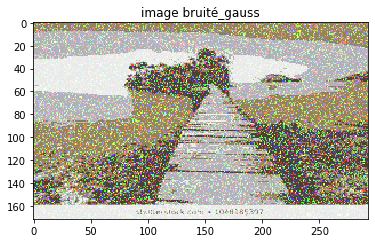

In [101]:

plt.title("image bruité_gauss")
plt.imshow(img_gauss)
plt.show()



In [102]:
#  Appliquer lissage d'image
blur = cv2.GaussianBlur(img_gauss,(5,5),0)

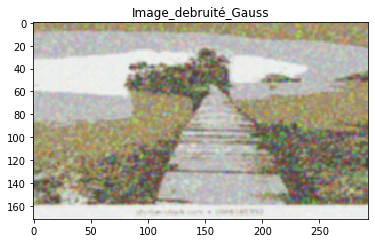

In [103]:
plt.title("Image_debruité_Gauss")
plt.imshow(blur)
plt.show()

On constate qu'aprés le lissage d'image, cette derniére perd leur netteté elle devienne flou puisque ce filtre agit sur des pixels mais resultats n'ont pas assez satisfaissantes

## <p style="color:#ff6666"> Analyse </p>

*****

### Suite à l'ajout de bruit de type "Salt & Pepper: S&P" et changement de Kmeans influt sur la netteté de l'image 
### Le clustering dans ce cas devient presque invisible de le cas de k est trés petites


 ### <a style="color:#ffb366" font=" Bookman"  size="75" >&quot; Partie3: Débruiter l'image bruité  &quot;    </a> 





En Pillow, le lissage par moyennage est implémenté dans la classe  PIL.ImageFilter.BoxBlur  et il s'applique avec la méthode  PIL.Image.filter :  

Plusieurs techniques de débruitage (ou lissage) ont été développées afin d'atténuer le bruit dans une image. Le lissage par moyenne désigne la solution la plus intuitive.

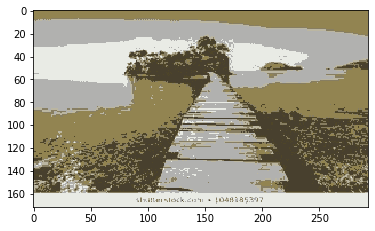

In [104]:
from PIL import ImageFilter
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('nature.jpg')
(h1, w1) = image.shape[:2]


image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 7)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

fig = plt.figure()
plt.imshow(quant)

noise_img = random_noise(quant, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')






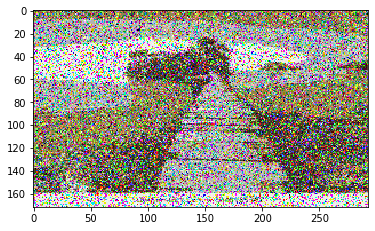

In [105]:
plt.imshow(noise_img)
plt.show()

In [106]:
median = cv2.medianBlur(noise_img,5)

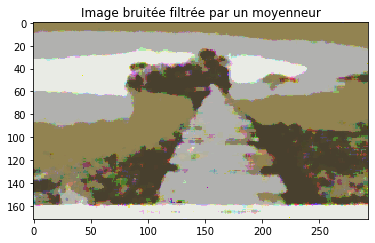

In [107]:
plt.title("Image bruitée filtrée par un moyenneur")
plt.imshow(median)
plt.show()

In [108]:
blur_b = cv2.bilateralFilter(img,9,75,75)

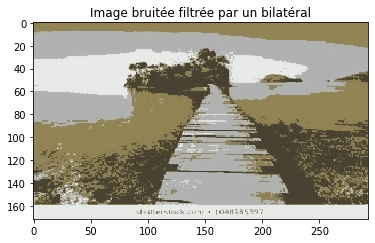

In [109]:
plt.title("Image bruitée filtrée par un bilatéral")
plt.imshow(blur_b)
plt.show()

## <p style="color:#ff6666"> Synthése: </p>


#### Le bruit « poivre-et-sel » utilisé ici consiste à mettre, aléatoirement,plusieurs pixels aux valeurs 255 ou 0 (valeurs extrêmes de l’intervalle des niveaux de gris). 

### L'application de debruitage par un filtre sur image ne correspond jamais a l'image donnée à l'origine